In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

DISEASE_PATH = r"C:\Users\Tori\Documents\Coding\Heart Disease ML Project\Heart_Disease_Predictor"

def load_heart_disease_data(disease_path=DISEASE_PATH):
    csv_path = os.path.join(disease_path, "heart_disease_data.csv")
    return pd.read_csv(csv_path)

# import dataset
heart_disease = load_heart_disease_data()

In [2]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [4]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


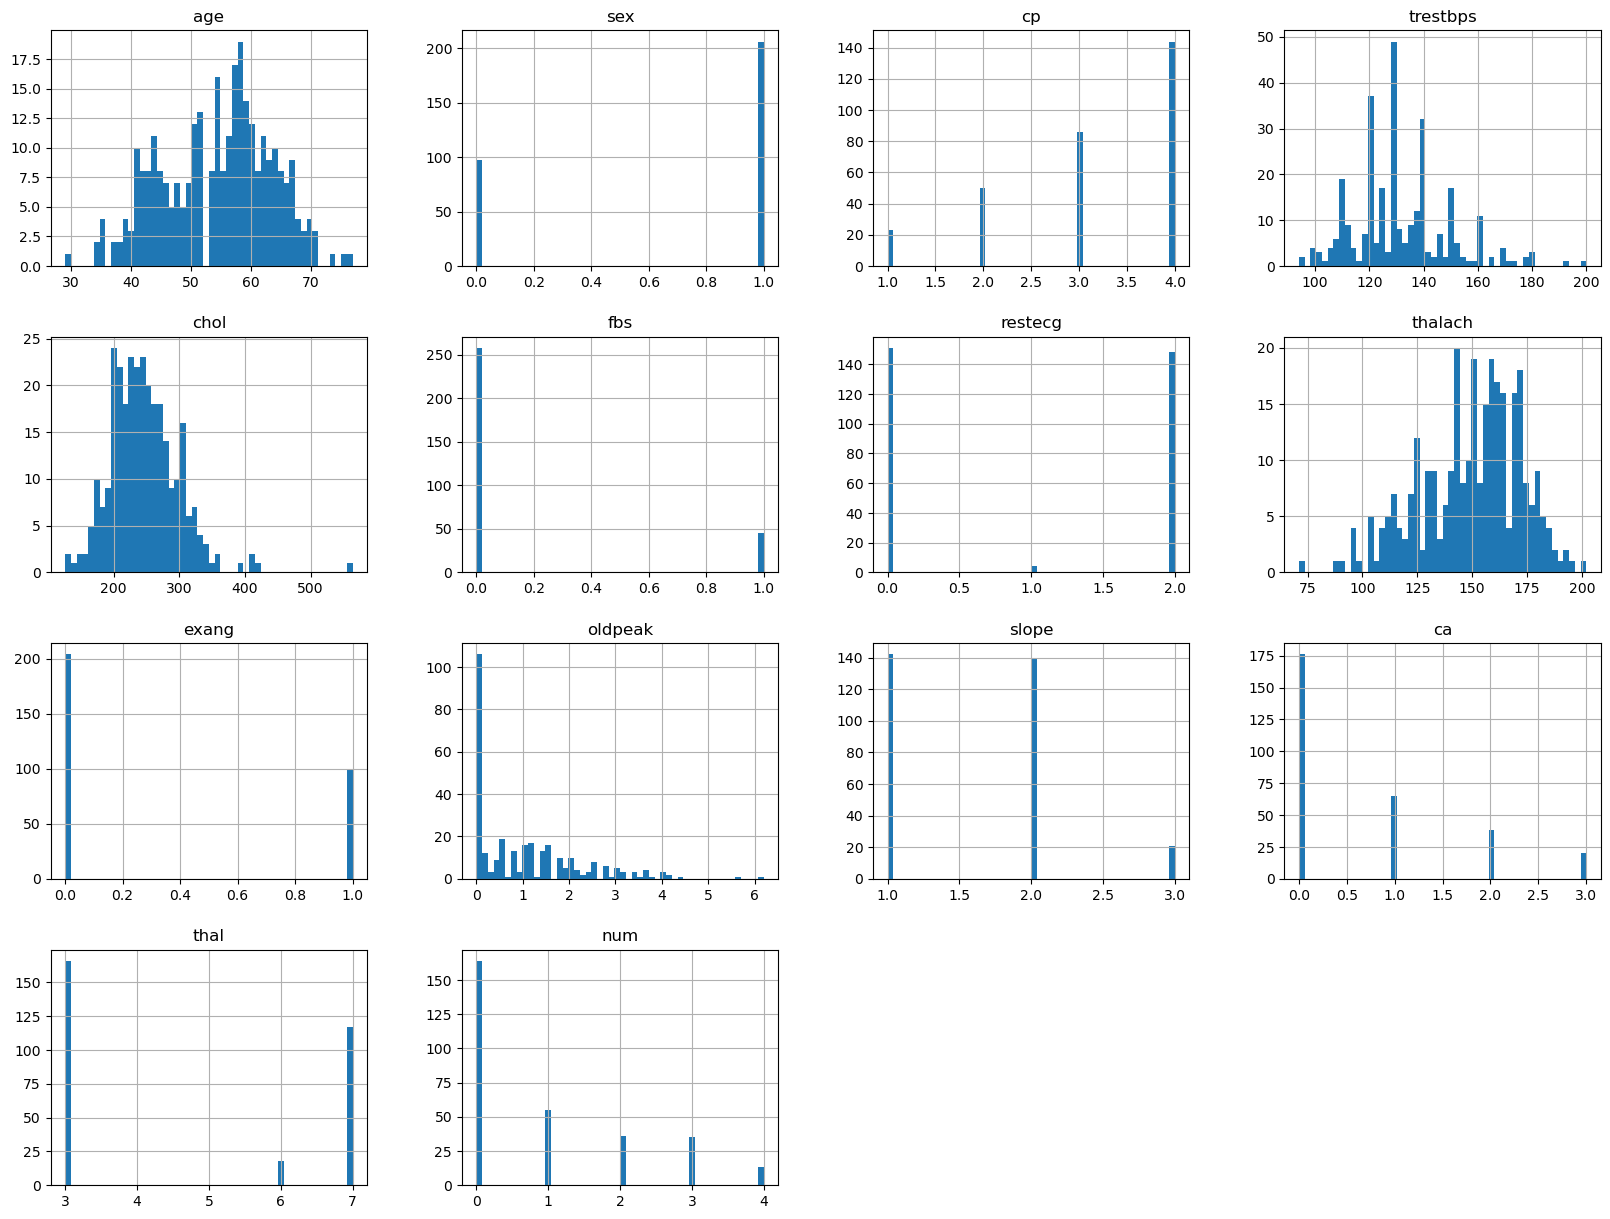

In [5]:
heart_disease.hist(bins=50, figsize=(20,15))
plt.show()

First, since we are only concerned with whether or not someone has heart disease ('num' = 1 or above) and not the severity, we are going to transform the 'num' column to 1s (1, 2, 3, or 4 will become 1) and 0s (0 will stay 0)

In [6]:
heart_disease['num'] = (heart_disease['num'] >= 1).astype(int)

We think that cholesterol is an important indicator of heart disease, so we are going to make sure that the train and test sets match proportions.

In [7]:
heart_disease["chol_cat"] = pd.cut(heart_disease["chol"],
                                   bins=np.arange(100, 600+1, 50).tolist(),
                                   labels = np.arange(1,11).tolist())

In [8]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(heart_disease, heart_disease["chol_cat"]):
    shuffle_train_set = heart_disease.loc[train_index]
    shuffle_test_set = heart_disease.loc[test_index]

In [9]:
for set_ in (shuffle_train_set, shuffle_test_set):
    set_.drop("chol_cat", axis=1, inplace=True)

In [10]:
heart_disease = shuffle_train_set.copy()

In [11]:
corr_matrix = heart_disease.corr()

In [12]:
corr_matrix["num"].sort_values(ascending=True)

thalach    -0.366813
fbs         0.009919
chol        0.135728
trestbps    0.166234
restecg     0.174493
age         0.257885
sex         0.275152
slope       0.327769
cp          0.381443
exang       0.417388
oldpeak     0.426035
ca          0.474503
thal        0.488120
num         1.000000
Name: num, dtype: float64

In [13]:
heart_disease = shuffle_train_set.drop("num", axis=1)
heart_disease_labels = shuffle_train_set["num"].copy()

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

heart_disease_prepared = pipeline.fit_transform(heart_disease)

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(heart_disease_prepared, heart_disease_labels)

LogisticRegression()

In [16]:
some_data = heart_disease.iloc[:5]
some_labels = heart_disease_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print("Predictions:", log_reg.predict(some_data_prepared))

Predictions: [0 0 0 0 1]


In [17]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 0]


In [18]:
from sklearn.metrics import mean_squared_error
disease_predictions = log_reg.predict(heart_disease_prepared)
log_mse = mean_squared_error(heart_disease_labels, disease_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

0.39626354032187944

In [19]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_reg, heart_disease_prepared, heart_disease_labels,
                         scoring="neg_mean_squared_error", cv=10)
log_rmse_scores = np.sqrt(-log_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(log_rmse_scores)

import joblib

joblib.dump(log_reg, "log_reg.pkl")

Scores: [0.4472136  0.48989795 0.45643546 0.28867513 0.35355339 0.54006172
 0.28867513 0.45643546 0.40824829 0.40824829]
Mean: 0.4137444438809818
Standard deviation: 0.07841472113672576


['log_reg.pkl']

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(heart_disease_prepared, heart_disease_labels)

DecisionTreeClassifier()

In [22]:
# training set evaluation

heart_disease_predictions = tree_reg.predict(heart_disease_prepared)
tree_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This indicates that there are no errors in the model, which is highly unlikely. It is more likely that the model is overfitting the data.

Cross-Validation

In [23]:
tree_scores = cross_val_score(tree_reg, heart_disease_prepared, heart_disease_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [24]:
display_scores(tree_rmse_scores)

joblib.dump(tree_reg, "tree_reg.pkl")

Scores: [0.56568542 0.56568542 0.57735027 0.40824829 0.57735027 0.54006172
 0.45643546 0.57735027 0.5        0.35355339]
Mean: 0.5121720527979451
Standard deviation: 0.07646211479815138


['tree_reg.pkl']

Tree classifier is actually worse than log reg

Random Forest Regressor Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier()
forest_reg.fit(heart_disease_prepared, heart_disease_labels)
heart_disease_predictions = forest_reg.predict(heart_disease_prepared)
forest_mse = mean_squared_error(heart_disease_labels, heart_disease_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


0.0

In [26]:
forest_scores = cross_val_score(forest_reg, heart_disease_prepared, heart_disease_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

joblib.dump(forest_reg, "forest_reg.pkl")

Scores: [0.4472136  0.4        0.40824829 0.45643546 0.28867513 0.54006172
 0.35355339 0.5        0.35355339 0.45643546]
Mean: 0.42041764557877803
Standard deviation: 0.07129050862022482


['forest_reg.pkl']

Logistic Regression and Random Forest Classifier have similar results, choosing random forest moving forward.

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(heart_disease_prepared, heart_disease_labels)
grid_search.best_params_
grid_search.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=10)

In [33]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', np.sqrt(-grid_search.best_score_))

Best parameters: {'max_features': 4, 'n_estimators': 10}
Best score: 0.42167063266129834


In [34]:
final_model = grid_search.best_estimator_

X_test = shuffle_test_set.drop('num', axis=1)
y_test = shuffle_test_set['num'].copy()

X_test_prepared = pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.40488816508945796


In [35]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.26140164, 0.50944876])